In [3]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation
import time


maxIter = 10000 # total number of time iteration
Re = 222        #reynolds number
nx, ny = 400, 41  # number of lattice nodes
cs = sqrt(1/3)
tau = float(.899)    #relaxation parameter
nulb = cs**2*(tau-.5) # viscoscity in lattice unites
dpdx = 1e-05
rho0 = 1
u0 = 0.1

fin = zeros((9, nx, ny))

            #0     1       2
v = array([[1,1], [1,0], [1,-1], #3      4      5
                                [0,1], [0,0], [0,-1],  #6      7       8
                                                     [-1,1], [-1,0], [-1,-1]])

t = array([[1/36], [1/9], [1/36],
                                 [1/9], [4/9], [1/9],
                                                     [1/36], [1/9], [1/36]])


### Function Definitions #####################################################

def fluid_solid(nx, ny):
  solid = zeros((nx, ny), dtype=bool)
  solid[:, 0] = True
  return solid

def macroscopic(fin):
    rho = sum(fin, axis = 0)
    u = zeros((2, nx, ny))
    for i in range(9):
        u[0, :, :] += v[i, 0] * fin[i, :, :]
        u[1, :, :] += v[i, 1] * fin[i, :, :]
    u /= rho
    return rho, u


def equilibrium(rho, u):
    usqr = (3/2) * (u[0]**2 + u[1]**2)
    feq = zeros((9, nx, ny))
    for i in range(9):
        uv = 3* (v[i, 0] * u[0,: ,:] + v[i, 1] * u[1, :, :])
        feq[i, :, :] = rho * t[i] *(1 + uv + 0.5* uv**2 - usqr)
    return feq

### Setup ##############################################################

solid = fluid_solid(nx, ny)
for i in range(9):
    fin[i,:,:] = t[i]*rho0


### Main Time Loop ###########################################################

for time in range(maxIter + 1):
    rho, u = macroscopic(fin)
    u[0,:,-1] = u0
    # compute equibliruim
    feq = equilibrium(rho, u)
    # collision step
    fout = fin - (fin - feq)/tau

    for i in range(9):
        #Streaming step
        fin[i, :, :] = roll(roll(fout[i,:,:], v[i,0], axis = 0), v[i, 1], axis = 1)
        # bounce-back
        fin[i, solid] = fout[8 - i , solid]
        # Moving-wall boundary condition
        fin[i,:,-1] = fout[8-i,:,-1] - 6*rho[:,-1]*t[8-i]*v[8-i, 0]*u0


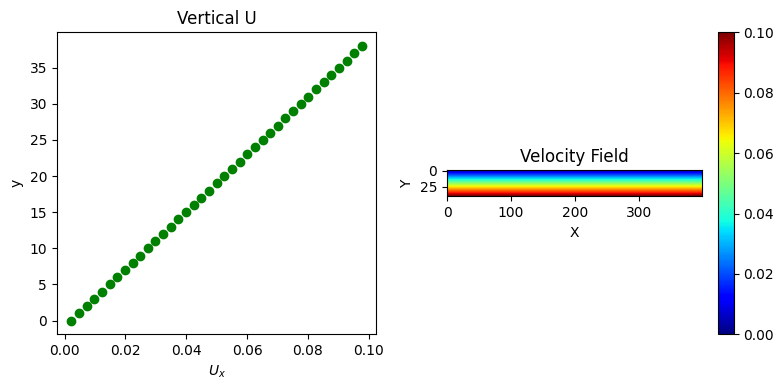

In [19]:
momentx = u[0, nx-1, 1:ny-1]
height = [j for j in range(0, ny-2)]
H = (ny-3)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(momentx, height, color= 'green', )
axs[0].set_ylabel('y')
axs[0].set_xlabel(r'$U_x$')
axs[0].set_title('Vertical U')

axs[1].set_title('Velocity Field')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
imgplot1 = axs[1].imshow(np.sqrt(u[0]**2 + u[1]**2).T, cmap='jet')
plt.colorbar(imgplot1, ax=axs[1])
plt.tight_layout()
plt.show()
